In [13]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [14]:
genders=["male","female"]
persons=[]

with open('data person.txt') as fh:
    for line in fh:
        persons.append(line.strip().split())
    

In [15]:
first_names={}
heights={}

for gender in genders:
    first_names[gender]=[x[0] for x in persons if x[4]==gender]
    heights[gender]=[x[2] for x in persons if x[4]==gender]
    heights[gender]=np.array(heights[gender],np.int32)

In [16]:
heights

{'male': array([184, 175, 187, 192, 204, 180, 184, 174, 177, 200, 193, 189, 188,
        187, 187, 190, 180, 155, 201, 171, 163, 191, 175, 170, 178, 191,
        176, 168, 169, 173, 180, 212, 189, 174, 167, 193, 164, 171, 165,
        198, 185, 175, 195, 164, 187, 192, 175, 190, 164, 161]),
 'female': array([149, 174, 183, 138, 145, 161, 179, 162, 148, 196, 163, 159, 150,
        170, 169, 167, 168, 170, 167, 152, 155, 151, 166, 165, 158, 152,
        159, 163, 174, 131, 154, 159, 159, 177, 180, 164, 163, 161, 183,
        170, 167, 166, 180, 161, 170, 172, 168, 156, 167, 167])}

In [17]:
class Feature:
    
    def __init__(self,data,name=None,bin_width=None):
        
        self.name=name
        self.bin_width=bin_width
        if bin_width:
            self.min,self.max=min(data),max(data)
            bins=np.arange((self.min//bin_width)*bin_width,(self.max//bin_width)*bin_width,bin_width)
            
            freq,bins=np.histogram(data,bins)
            self.freq_dict=dict(zip(bins,freq))
            self.freq_sum=sum(self.freq_dict.values())
            
        else:
            self.freq_dict=dict(Counter(data))
            self.freq_sum=sum(self.freq_dict.values())
            
            
    def frequency(self,value):
        
        if self.bin_width:
            value=(value//self.bin_width)*self.bin_width
        if value in self.freq_dict:
            return self.freq_dict[value]
        
        else:
            return 0
        
        

In [18]:
fts={}
for gender in genders:
    fts[gender]=Feature(heights[gender],name=gender,bin_width=5)
    print(gender, fts[gender].freq_dict)

male {155: 1, 160: 5, 165: 4, 170: 6, 175: 7, 180: 5, 185: 8, 190: 8, 195: 2, 200: 3}
female {130: 1, 135: 1, 140: 0, 145: 3, 150: 5, 155: 7, 160: 8, 165: 11, 170: 7, 175: 2, 180: 4, 185: 0}


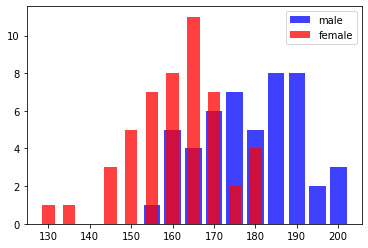

In [19]:
for gender in genders:
    frequencies = list(fts[gender].freq_dict.items())
    frequencies.sort(key=lambda x: x[1])
    X, Y = zip(*frequencies)
    color = "blue" if gender=="male" else "red"
    bar_width = 4 if gender=="male" else 3
    plt.bar(X, Y, bar_width, color=color, alpha=0.75, label=gender)


plt.legend(loc='upper right')

In [28]:
class NBclass:
    
    def __init__(self,name,*features):
        self.features=features
        self.name=name
        
    def probability_value_given_feature(self,feature_value,feature):
        if feature.freq_sum==0:
            return 0
        
        else:
            return feature.frequency(feature_value)/feature.freq_sum
        
        

In [29]:
cls={}

for gender in genders:
    cls[gender]=NBclass(gender,fts[gender])

In [42]:
cls['male'].features

(<__main__.Feature at 0x28e8e486c40>,)

In [38]:
class Classifier:
    def __init__(self,*nbclasses):
        self.nbclasses=nbclasses
        
    def prob(self,*d,best_only=True):
        nbclasses=self.nbclasses
        probability_list=[]
        
        for nbclass in nbclasses:
            
            ftrs=nbclass.features
            prob=1
            
            for i in range(len(ftrs)):
                prob*=nbclass.probability_value_given_feature(d[i],ftrs[i])
                
            probability_list.append((prob,nbclass.name))
                                    
        prob_values=[f[0] for f in probability_list]
        prob_sum = sum(prob_values)
        
        if prob_sum==0:
            number_classes=len(self.nbclasses)
            pl=[]
            
            for prob_element in probability_list:
                pl.append((1/number_classes,prob_element[1]))
                
            probability_list=pl
        else:
            
            probability_list=[(p[0]/prob_sum,p[1]) for p in probability_list]
            
        if best_only:
            return max(probability_list)
        else:
            return probability_list
                     

In [39]:
c=Classifier(cls['male'],cls['female'])

for i in range(130,220,5):
    print(i,c.prob(i,best_only=False))

130 [(0.0, 'male'), (1.0, 'female')]
135 [(0.0, 'male'), (1.0, 'female')]
140 [(0.5, 'male'), (0.5, 'female')]
145 [(0.0, 'male'), (1.0, 'female')]
150 [(0.0, 'male'), (1.0, 'female')]
155 [(0.125, 'male'), (0.875, 'female')]
160 [(0.3846153846153847, 'male'), (0.6153846153846154, 'female')]
165 [(0.26666666666666666, 'male'), (0.7333333333333333, 'female')]
170 [(0.4615384615384616, 'male'), (0.5384615384615385, 'female')]
175 [(0.7777777777777778, 'male'), (0.22222222222222224, 'female')]
180 [(0.5555555555555556, 'male'), (0.4444444444444445, 'female')]
185 [(1.0, 'male'), (0.0, 'female')]
190 [(1.0, 'male'), (0.0, 'female')]
195 [(1.0, 'male'), (0.0, 'female')]
200 [(1.0, 'male'), (0.0, 'female')]
205 [(0.5, 'male'), (0.5, 'female')]
210 [(0.5, 'male'), (0.5, 'female')]
215 [(0.5, 'male'), (0.5, 'female')]
